In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from random import randint
import pickle

# for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# for dimension reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [22]:
from utils import *

In [23]:
df_transport = pd.read_csv('transport_dataset.csv')
df_transport.shape

(416314, 2)

In [24]:
df_transport.head()

path  car_id
0  raw_data/veriwild/veriwild/1/00001/000001.jpg       1
1  raw_data/veriwild/veriwild/1/00001/000002.jpg       1
2  raw_data/veriwild/veriwild/1/00001/000003.jpg       1
3  raw_data/veriwild/veriwild/1/00001/000004.jpg       1
4  raw_data/veriwild/veriwild/1/00001/000005.jpg       1

In [28]:
# with open('descriptors/efficientnet-b7.pickle', 'rb') as f:
    # enb7 = pickle.load(f)
with open('descriptors/vdc_color.pickle', 'rb') as f:
    vdcc = pickle.load(f)
# with open('descriptors/vdc_type.pickle', 'rb') as f:
#     vdct = pickle.load(f)

In [29]:
n_samples = 4000

# data = np.hstack([enb7, vdcc, vdct])
data = vdcc.copy()
idx = np.random.choice(data.shape[0], n_samples, replace=False)

idx

array([293596, 104992, 326792, ..., 238093, 141104, 213886])

In [30]:
data = data[idx, :]

df = df_transport.iloc[idx, :]

data.shape, df.shape

((4000, 128), (4000, 2))

In [31]:
pca = PCA(0.91, random_state=42) # n_components=XXX
pca.fit(data)
data = pca.transform(data)

pca.n_components_

67

In [58]:
# ENB7 for 3000 samples
# pca = PCA(0.8, random_state=42) # EPS=7 max clusters found
# pca = PCA(0.98, random_state=42) # EPS=9 max cluster found

In [1]:
# # for i in range(x.shape[0]):
# for i in range(1):
#     # plt.plot(np.sort(x[i]))
#     plt.plot(x[i])

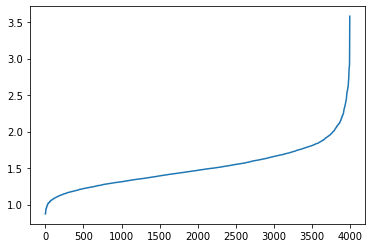

In [32]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

In [33]:
def calc_clusters_size_std(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return counts.std()

In [34]:
from sklearn.metrics import calinski_harabasz_score

for eps in np.arange(0.01, 2.5, step=0.15):
    for min_samples in np.arange(2, 5, step=1):
        # eps = 1.5
        dbscan = DBSCAN(
            eps=eps,
            min_samples=min_samples,
            metric='euclidean',
            #  algorithm ='auto'
        )
        dbscan.fit(data)
        c = np.unique(dbscan.labels_).shape[0]
        score = 0
        if c == 1:
            continue
        
        score = calinski_harabasz_score(data, dbscan.labels_)
        std = calc_clusters_size_std(dbscan.labels_)
        print(f'eps={eps} min_samples={min_samples} clusters={c} calinski_harabasz={score} std={std}')

eps=0.9099999999999999 min_samples=2 clusters=4 calinski_harabasz=1.504478689531597 std=1728.5867059537395
eps=1.06 min_samples=2 clusters=37 calinski_harabasz=1.601915929346065 std=635.6487974644822
eps=1.06 min_samples=3 clusters=6 calinski_harabasz=2.075372382567996 std=1483.5566124089173
eps=1.21 min_samples=2 clusters=108 calinski_harabasz=3.1335937608851734 std=338.509749460942
eps=1.21 min_samples=3 clusters=29 calinski_harabasz=7.331061109858077 std=672.4644295699668
eps=1.21 min_samples=4 clusters=18 calinski_harabasz=9.094869047619959 std=861.4450750244907
eps=1.3599999999999999 min_samples=2 clusters=147 calinski_harabasz=3.2287705780803946 std=233.28582309193268
eps=1.3599999999999999 min_samples=3 clusters=42 calinski_harabasz=6.790110514320583 std=460.4336883916029
eps=1.3599999999999999 min_samples=4 clusters=23 calinski_harabasz=10.229742009653092 std=633.2578919018338
eps=1.51 min_samples=2 clusters=118 calinski_harabasz=4.6293815863794245 std=238.7989151180005
eps=1.5

In [46]:
dbscan = DBSCAN(
    min_samples=2,
    eps=1.36,
)
dbscan.fit(data)
np.unique(dbscan.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145], dtype=int64)

In [35]:
dbscan = DBSCAN(
    min_samples=3,
    eps=2,
)
dbscan.fit(data)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [47]:
df.loc[:, 'label'] = dbscan.labels_

In [48]:
for n_clusters in np.arange(2,  25, step=1):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(data)
    score = calinski_harabasz_score(data, model.labels_)
    std = calc_clusters_size_std(model.labels_)
    print(f'n={n_clusters} calinski_harabasz={score} std={std} i={model.inertia_}')

n=2 calinski_harabasz=2207.5624843411824 std=21.0 i=20742.02734375
n=3 calinski_harabasz=1608.4164799076405 std=770.0776295644197 i=17838.486328125
n=4 calinski_harabasz=1330.5142390034607 std=490.5124870989525 i=16106.564453125
n=5 calinski_harabasz=1106.5406147218557 std=322.7463400257236 i=15273.3759765625
n=6 calinski_harabasz=955.1796202123472 std=227.4369265435047 i=14662.3896484375
n=7 calinski_harabasz=844.5297066209024 std=237.1761594516719 i=14189.044921875
n=8 calinski_harabasz=760.1014252277303 std=259.7258169685871 i=13800.84765625
n=9 calinski_harabasz=701.3008408595297 std=222.7969235330741 i=13382.501953125
n=10 calinski_harabasz=651.9016989938373 std=173.1525339115775 i=13032.0791015625
n=11 calinski_harabasz=609.3438491325606 std=198.2800007002369 i=12737.642578125
n=12 calinski_harabasz=571.4634327559709 std=185.991188560701 i=12496.8935546875
n=13 calinski_harabasz=538.6395628139088 std=150.68376698614915 i=12282.6533203125
n=14 calinski_harabasz=511.04618753893783 

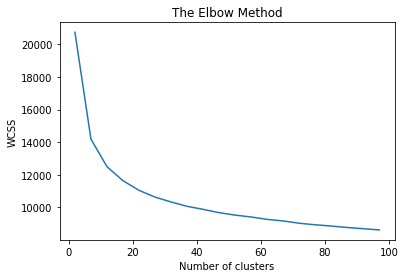

In [49]:
# Using the elbow method to find  the optimal number of clusters
# from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

wcss = []
for i in range(2, 100, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    # wcss.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
plt.plot(range(2, 100, 5), wcss)
# plt.plot(K, inertias, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=25, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=25, random_state=42)

In [51]:
df.loc[:, 'label'] = kmeans.labels_

In [52]:
tsne = TSNE(n_components=2, random_state=42)
projection = tsne.fit_transform(data)

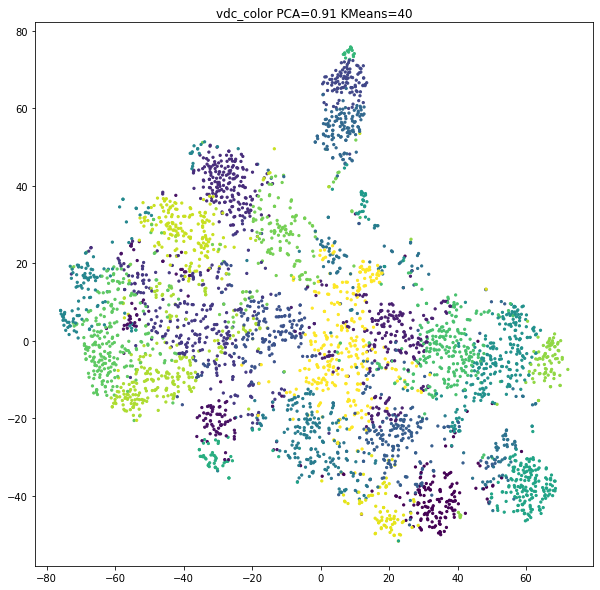

In [53]:
plt.figure(figsize=(10,10))
plt.title(f'vdc_color PCA={0.91} KMeans={40}')
plt.scatter(x=projection[:,0], y=projection[:,1], c=kmeans.labels_, s=5)

In [54]:
# from keras.preprocessing.image import load_img 
# from keras.preprocessing.image import img_to_array 
from skimage import io

def show_clusters(df, max_images=10, size=25, title=None):
    i = 0
    clusters = df.groupby('label')
    rows = len(clusters.groups.keys())
    figsize = (int(size * (max_images/rows) * 1), size)
    plt.figure(figsize=figsize)
    if title:
        plt.suptitle(title, size=16)
        # plt.title(title)
    for c in clusters.groups.keys():
        cdf = clusters.get_group(c)
        if cdf.shape[0] > max_images:
            cdf = cdf.sample(max_images)
        for index, row in cdf.iterrows():
            plt.subplot(rows, max_images, i+1)
            file = row['path']
            img = io.imread(file)
            img = np.array(img)
            plt.imshow(img)
            plt.axis('off')
            i += 1

In [55]:
clusters = df.groupby(['label']).size().to_frame(name='count').reset_index()
clusters.sort_values('count', ascending=False)
clusters.head()

label  count
0      0    155
1      1    117
2      2    212
3      3    197
4      4    270

In [56]:
clusters.plot.bar(x='label', y='count', rot=0)

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

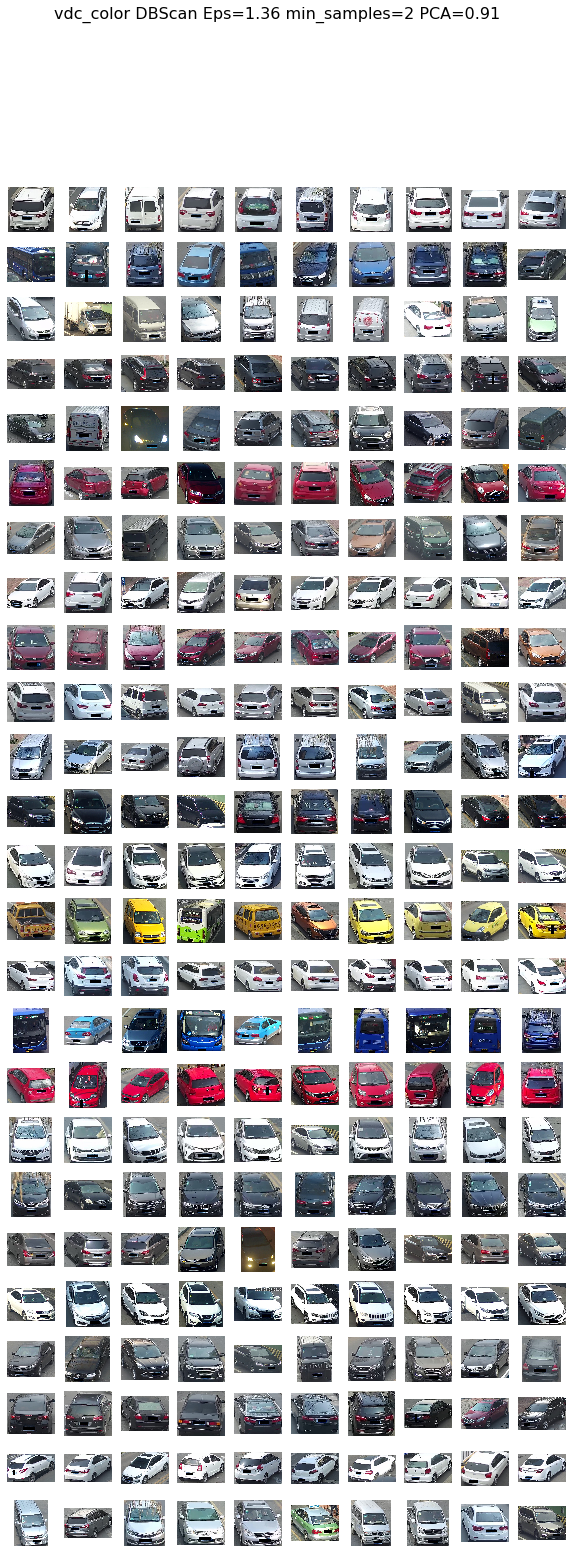

In [58]:
# df_cluster = df[df['label'] == 3]
show_clusters(df, max_images=25, size=60, title=f'vdc_color DBScan Eps=1.36 min_samples=2 PCA=0.91')
# df_cluster.shape